# Independent Project: Automatic Bee Species Identification
To predict the species of a bee, given its description in text format, using Information Retrieval, Natural Language Processing and Machine Learning techniques.

In [1]:
import numpy as np
import pandas as pd

In [2]:
f = open('dataset bees.txt', 'r', encoding='utf8')

In [3]:
x = f.read()

In [4]:
x = x[x.index('}}')+2:]
samples = {}
s = x.split('\n')
s = [i for i in s if i != '']

In [5]:
samples = {}
i = 0
while i < len(s)-1:
  samples[s[i]] = s[i+1]
  i+=2
# samples

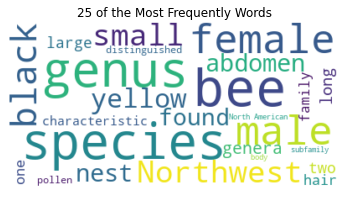

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ""
for key, value in samples.items():
    text += value + "\n"
import matplotlib.pyplot as plt

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white", max_words=25).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("25 of the Most Frequently Words")
plt.show()

In [7]:
# wordcloud.to_file("wordcloud_common_words.png")

In [8]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import string
from nltk.stem import WordNetLemmatizer 
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
punc = string.punctuation
lem = WordNetLemmatizer()
for i in samples:
  samples[i] = samples[i].lower()
  samples[i] = samples[i].strip()
  for ele in samples[i]:  
    if ele in punc:  
        samples[i] = samples[i].replace(ele, "")  
  toks = word_tokenize(samples[i])
  fil = [w for w in toks if not w in stop_words] 
  fil = [lem.lemmatize(w) for w in fil ]
  samples[i] = fil

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [11]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tf = tfIdfVectorizer.fit_transform(samples)

In [12]:
df = pd.DataFrame(tf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)

In [13]:
def computeTFReview(review):
    reviewTFDict = {}
    for word in review:
        if word in reviewTFDict:
            reviewTFDict[word] += 1
        else:
            reviewTFDict[word] = 1
    for word in reviewTFDict:
        reviewTFDict[word] = reviewTFDict[word] / len(review)
    return reviewTFDict

In [14]:
tfDict = {}
reviewNo = 1
for review in samples:
    tfDict['review: ' + str(reviewNo)] = computeTFReview(samples[review])
    reviewNo += 1

In [15]:
vocab = []
for i in tfDict:
  vocab+=list(tfDict[i].keys())
vocab = list(set(vocab))
len(vocab)

1842

In [16]:
def computeCountDict(tfDict):
    countDict = {}
    for review in tfDict:
        for word in tfDict[review]:
            if word in countDict:
                countDict[word] += 1
            else:
                countDict[word] = 1
    return countDict

In [17]:
countDict = computeCountDict(tfDict)

In [18]:
def computeIDF(countDict, n):
    import math
    idfDict = {}
    for word in countDict:
        idfDict[word] = math.log(n/countDict[word])
    return idfDict

In [19]:
idfDict = computeIDF(countDict, len(samples[review]))
data = zip(idfDict.keys(), idfDict.values())
df = pd.DataFrame(data, columns=['word','idf'])

Text(0.5, 1.0, 'Distribution of IDF Values')

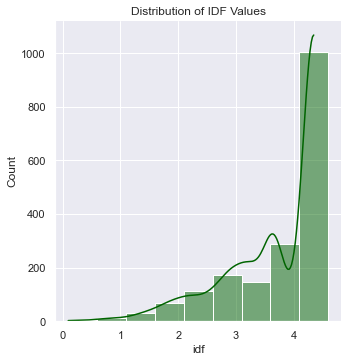

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
cmap = sns.color_palette("mako")
sns.displot(df, x="idf", binwidth=0.5, color="darkgreen", kde=True)
plt.title('Distribution of IDF Values')

In [21]:
def computeTFIDF(review, idfDict):
    tfidfDict = {}
    for word in review:
        tfidfDict[word] = review[word] * idfDict[word]
    return tfidfDict

In [22]:
tfidfDict = {}
review_no = 0
for review in tfDict:
    tfidfDict['review: ' + str(review_no)] = computeTFIDF(tfDict[review], idfDict)
    review_no += 1
len(tfidfDict)

102

In [23]:
tfidfDict['review: 1']
for i in tfidfDict:
  x = (sorted(tfidfDict[i].items(), key=lambda item: item[1]))

In [24]:
q1 = 'It is a moderately large parasitic north american black multitoothed comb apex male'
a1 = 'Genus: Stelis Panzer'
q2 = 'Some of the first bees to emerge in spring, vary greatly in size and appearance. Females have patches of velvety hairs between the eyes.'
a2 = 'Genus: Andrena Fabricius'
q3 = 'Hoplitis is a moderately large Holarctic and Ethiopian genus with about 26 North American species. Eleven of these are recorded from the Northwest. The genus is extremely diverse, with 10 North American subgenera currently recognized (Alcidamea Cresson, Andronicus Cresson, Chlorosmia Sla'
a3 = 'Genus: Hoplitis Klug'
q4 = 'This is a large subfamily of morphologically diverse bees that are world-wide in distribution but represented in North America only by the genus Nomia'
a4 = 'Subfamily: Nomiinae'

In [25]:
def prepro(s):
  punc = string.punctuation
  lem = WordNetLemmatizer()
  s = s.lower()
  s = s.strip()
  for ele in s:  
    if ele in punc:  
        s = s.replace(ele, "")  
    toks = word_tokenize(s)
    fil = [w for w in toks if not w in stop_words] 
    fil = [lem.lemmatize(w) for w in fil ]
  ans = []
  for i in fil:
    if(i in vocab):
      ans.append(i)
  return ans

## TF-IDF Algorithms
### 1. Raw TF-IDF

In [26]:
def rank_raw(q):
  if q == '':
    return 'Please Enter a Valid Query'
  q1toks = prepro(q)
  score = {}
  for i in tfidfDict.keys():
    score[i] = 0
  for i in q1toks:
    for j in tfidfDict:
      if( i in tfidfDict[j]):
        score[j]+= tfidfDict[j][i]
  score = dict(sorted(score.items(), key=lambda item: item[1]))
  ans = list(score.keys())[-15:]
  ans = [int(x[-2:]) for x in ans]
  sk = list(samples.keys())
  topten = [sk[i] for i in ans]
  return topten

In [27]:
rank_raw(q2)

['Sawflies and wood-wasps (Symphyta)',
 'Asian honey bee (Apis cerana)',
 'Family: Oxaeidae',
 'Striped Green Sweat Bees (Agapostemon)',
 'Mason Bees (Osmia)',
 'Sweat Bees (Lasioglossum)',
 'Carpenter bees ',
 'Hylaeus',
 'Microthurge',
 'Genus: Colletes Latreille',
 'Subfamily: Dasypodinae ',
 'Small Carpenter Bees (Ceratina)',
 'Long-horned Bees (Melissodes)',
 'Miner bees (Andrenidae)',
 'Mining Bees (Andrena)']

### 2. Boolean TF-IDF

In [28]:
def rank_bool(q):
  if q == '':
    return 'Please Enter a Valid Query'
  q1toks = prepro(q)
  score = {}
  for i in tfidfDict.keys():
    score[i] = 0
  qlis = {}
  for i in q1toks:
    if i in qlis:
      qlis[i]+=1
    else:
      qlis[i] = 1
  for i in range(len(q1toks)):
    for j in tfidfDict:
      if( q1toks[i] in tfidfDict[j]):
        score[j]+= tfidfDict[j][q1toks[i]]*qlis[q1toks[i]]
  score = dict(sorted(score.items(), key=lambda item: item[1]))
  ans = list(score.keys())[-15:]
  ans = [int(x[-2:]) for x in ans]
  sk = list(samples.keys())
  topten = [sk[i] for i in ans]
  return topten

In [29]:
rank_bool(q2)

['Sawflies and wood-wasps (Symphyta)',
 'Asian honey bee (Apis cerana)',
 'Family: Oxaeidae',
 'Striped Green Sweat Bees (Agapostemon)',
 'Mason Bees (Osmia)',
 'Sweat Bees (Lasioglossum)',
 'Carpenter bees ',
 'Hylaeus',
 'Microthurge',
 'Genus: Colletes Latreille',
 'Subfamily: Dasypodinae ',
 'Small Carpenter Bees (Ceratina)',
 'Long-horned Bees (Melissodes)',
 'Miner bees (Andrenidae)',
 'Mining Bees (Andrena)']

### 3. Log-Normalised TF-IDF

In [30]:
import math
def rank_lognorm(q):
  if q == '':
    return 'Please Enter a Valid Query'
  q1toks = prepro(q)
  score = {}
  for i in tfidfDict.keys():
    score[i] = 0
  qlis = {}
  for i in q1toks:
    if i in qlis:
      qlis[i]+=1
    else:
      qlis[i] = 1
  for i in qlis:
    qlis[i]*= abs(idfDict[i])
    qlis[i] = math.log(1+qlis[i])
  for i in range(len(q1toks)):
    for j in tfidfDict:
      if( q1toks[i] in tfidfDict[j]):
        score[j]+= math.log(1+tfidfDict[j][q1toks[i]])*qlis[q1toks[i]]
  score = dict(sorted(score.items(), key=lambda item: item[1]))
  ans = list(score.keys())[-15:]
  ans = [int(x[-2:]) for x in ans]
  sk = list(samples.keys())
  topten = [sk[i] for i in ans]
  return topten

In [31]:
rank_lognorm(q2)

['Sweat Bees (Lasioglossum)',
 'Striped Green Sweat Bees (Agapostemon)',
 'Sawflies and wood-wasps (Symphyta)',
 'Mason Bees (Osmia)',
 'Dufoureinae',
 'Genus: Colletes Latreille',
 'Family: Oxaeidae',
 'Subfamily: Hylaeinae',
 'Hylaeus',
 'Genus: Dianthidium Cockerell',
 'Subfamily: Dasypodinae ',
 'Small Carpenter Bees (Ceratina)',
 'Long-horned Bees (Melissodes)',
 'Miner bees (Andrenidae)',
 'Mining Bees (Andrena)']

### Rank after combining all the TF-IDF Algorithms

In [32]:
def merge(a,b,c):
  saare = {}
  tot = [a, b, c]
  for x in tot:
    for i in range(len(x)):
      if x[i] in saare:
        saare[x[i]]+= i
      else:
        saare[x[i]] = i
  saare = sorted(saare.items(), key= lambda item: item[1])
  toans = saare[-15:]
  ans = []
  for i in range(len(toans)-1,-1, -1):
    ans.append(toans[i][0])
  return ans

In [33]:
def find_ranks(q):
  if q == '':
    return 'Please Enter a Valid Query'
  a = rank_raw(q)
  b = rank_bool(q)
  c = rank_lognorm(q)
  x = merge(a,b,c)
  return x

#### find_ranks() gives the list of 15 most probable species

In [34]:
find_ranks(q2)

['Mining Bees (Andrena)',
 'Miner bees (Andrenidae)',
 'Long-horned Bees (Melissodes)',
 'Small Carpenter Bees (Ceratina)',
 'Subfamily: Dasypodinae ',
 'Genus: Colletes Latreille',
 'Hylaeus',
 'Microthurge',
 'Carpenter bees ',
 'Mason Bees (Osmia)',
 'Sweat Bees (Lasioglossum)',
 'Family: Oxaeidae',
 'Genus: Dianthidium Cockerell',
 'Subfamily: Hylaeinae',
 'Striped Green Sweat Bees (Agapostemon)']

## Machine Learning Models

In [35]:
test_x = [q1, q2, q3, q4, 'orange',  'very big bees in the forest', '  often have black integument with extensive yellow markings', ' This family contains mason bees and leaf-cutter in their nest', ' is of limited help as, unless they’re flying, their wings are generally folded over the body and you can’t see this detail lack of any ‘waist’.']
test_y = [a1, a2, a3, a4, 'Austrostelis',  'Ichneumons (Ichneumonidae)', 'Icteranthidium', 'Megachilidae', 'Sawflies and wood-wasps (Symphyta)']
y = list(samples.keys())

In [36]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
y_en = Encoder.fit_transform(y)
y_dict = {}
for i in range(len(y)):
  y_dict[y[i]] = y_en[i]
test_y_en = []
for i in test_y:
  test_y_en.append( y_dict[i])

In [37]:
y_en

array([  8,  10,  84,  82,  64,  97,  85,  67,  11,  53,  78,  96,  79,
         9,  65,  68,  60,  63,  77,  62,  61,  87,  32,  91,  55,  15,
        90,  36,  20,  25,  49,  94,  13,  43,  89,  35,  33,  41,  14,
        86,  21,  95,  46,  42,  27,  44,  48,  18,  17,  88,  37,  92,
         0,  16,  93,  38,  45,  23,  26,  34,  22,  50,  47,  99,  40,
        29,  31,  28,  30,  24,  39,  76,  72,  81,  12,  80,  52,   2,
        19, 100,  56,  58,  83,  75,  74,  59,  51,   5,   4,   7,   3,
        73,   1,  69,  57,  98,  66,  70, 101,  54,  71,   6], dtype=int64)

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [39]:
samples_2 = {}
for i in samples:
  s = ""
  for j in samples[i]:
    s+=j+' '
  if 'text' in samples_2:
    samples_2['text'].append(s)
  else:
    samples_2['text'] = [s]

  if 'label' in samples_2:
    samples_2['label'].append(i)
  else:
    samples_2['label'] = [i]

In [40]:
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(samples_2['text'])

TfidfVectorizer()

In [41]:
samples_2['text'] = tfidf_vect.transform(samples_2['text'])
test_x = tfidf_vect.transform(test_x)

### 1. Naive Bayes

In [42]:
Naive = naive_bayes.MultinomialNB()
Naive.fit(samples_2['text'],list(y_dict.values()))
predictions_NB = Naive.predict(test_x)
nb_acc = accuracy_score(predictions_NB, test_y_en)*100
print("Naive Bayes Accuracy Score -> ", nb_acc)

Naive Bayes Accuracy Score ->  77.77777777777779


### 2. Support Vector Machines

In [43]:
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(samples_2['text'],list(y_dict.values()))
predictions_SVM = SVM.predict(test_x)
svc_acc = accuracy_score(predictions_SVM, test_y_en)*100
print("SVM Accuracy Score -> ", svc_acc)

SVM Accuracy Score ->  77.77777777777779


### 3. Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(samples_2['text'],list(y_dict.values()))
predictions_RF = rf.predict(test_x)
rf_acc = accuracy_score(predictions_RF, test_y_en)*100
print("Random Forest Accuracy Score -> ", rf_acc)

Random Forest Accuracy Score ->  55.55555555555556


### 4. K-Nearest Neighbors

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(samples_2['text'],list(y_dict.values()))
predictions_knn = knn.predict(test_x)
knn_acc = accuracy_score(predictions_knn, test_y_en)*100
print("KNN Accuracy Score -> ", knn_acc)

KNN Accuracy Score ->  11.11111111111111


### 5. Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(samples_2['text'],list(y_dict.values()))
predictions_lr = lr.predict(test_x)
lr_acc = accuracy_score(predictions_lr, test_y_en)*100
print("Logistic Regression Accuracy Score -> ", lr_acc)

Logistic Regression Accuracy Score ->  88.88888888888889



### 6. Multilayer Perceptron

In [47]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=500).fit(samples_2['text'],list(y_dict.values()))
predictions_mlp = mlp.predict(test_x)
mlp_acc = accuracy_score(predictions_mlp, test_y_en)*100
print("Neural Network Accuracy Score -> ", mlp_acc)

Neural Network Accuracy Score ->  77.77777777777779


In [48]:
acc = [nb_acc, svc_acc, rf_acc, knn_acc, lr_acc, mlp_acc]
model = ['Naive Bayes', 'SVM Classifier', 'Random Forest Classifier', 'K-Neighbour Classifier', 'Logistic Regression', 'MLP Classifier']

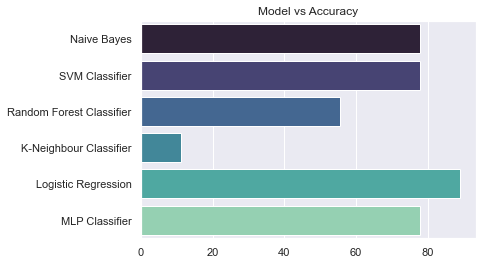

In [49]:
%matplotlib inline
import seaborn as sns
sns.set()
cmap = sns.color_palette("mako")
plt = sns.barplot(x=acc, y=model, palette=cmap).set_title('Model vs Accuracy')

Logistic Regression gives us the best accuracy (**88.89%**).